In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
lunitmodel = pd.read_csv('./lstm 학습 데이터.csv', encoding='cp949')

In [4]:
lunitmodel

,종목코드,종목명,날짜,시간,시가,고가,저가,종가,거래량,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL
0,A328130,루닛,20220907,901,33500.0,33500.0,33450.0,0.0,190.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
1,A328130,루닛,20220907,902,33650.0,33650.0,33550.0,33650.0,210.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0
2,A328130,루닛,20220907,903,33650.0,33750.0,33650.0,33650.0,319.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
3,A328130,루닛,20220907,904,33700.0,33700.0,33650.0,33650.0,462.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
4,A328130,루닛,20220907,905,33700.0,33700.0,33700.0,33700.0,589.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77751,A328130,루닛,20230718,1517,176400.0,176600.0,176400.0,176500.0,237135.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0
77752,A328130,루닛,20230718,1518,176500.0,176600.0,176400.0,176500.0,237532.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,0.0
77753,A328130,루닛,20230718,1519,176600.0,176600.0,176500.0,176600.0,237947.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0
77754,A328130,루닛,20230718,1520,176600.0,176800.0,176500.0,176800.0,238596.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0


In [5]:
# hi = hi.drop(columns = '누적체결매도수량')
# hi = hi.drop(columns = '누적체결매수수량')
lunitmodel = lunitmodel.drop(columns = '종목코드')
lunitmodel = lunitmodel.drop(columns = '종목명')
# hi = hi.drop(columns = '시간')
# hi = hi.drop(columns = '거래대금')

In [6]:
lunitmodel

,날짜,시간,시가,고가,저가,종가,거래량,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL
0,20220907,901,33500.0,33500.0,33450.0,0.0,190.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
1,20220907,902,33650.0,33650.0,33550.0,33650.0,210.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0
2,20220907,903,33650.0,33750.0,33650.0,33650.0,319.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
3,20220907,904,33700.0,33700.0,33650.0,33650.0,462.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0
4,20220907,905,33700.0,33700.0,33700.0,33700.0,589.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77751,20230718,1517,176400.0,176600.0,176400.0,176500.0,237135.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0
77752,20230718,1518,176500.0,176600.0,176400.0,176500.0,237532.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,0.0
77753,20230718,1519,176600.0,176600.0,176500.0,176600.0,237947.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0
77754,20230718,1520,176600.0,176800.0,176500.0,176800.0,238596.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0


In [7]:
lunitmodel['date'] = lunitmodel['날짜'].map(str) + "" + lunitmodel['시간'].map(str)
lunitmodel

,날짜,시간,시가,고가,저가,종가,거래량,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL,date
0,20220907,901,33500.0,33500.0,33450.0,0.0,190.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907901
1,20220907,902,33650.0,33650.0,33550.0,33650.0,210.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0,20220907902
2,20220907,903,33650.0,33750.0,33650.0,33650.0,319.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907903
3,20220907,904,33700.0,33700.0,33650.0,33650.0,462.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907904
4,20220907,905,33700.0,33700.0,33700.0,33700.0,589.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0,20220907905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77751,20230718,1517,176400.0,176600.0,176400.0,176500.0,237135.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181517
77752,20230718,1518,176500.0,176600.0,176400.0,176500.0,237532.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,0.0,202307181518
77753,20230718,1519,176600.0,176600.0,176500.0,176600.0,237947.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181519
77754,20230718,1520,176600.0,176800.0,176500.0,176800.0,238596.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181520


In [8]:
# lunitmodel.rename(columns={'날짜':'date'}, inplace=True)
lunitmodel.rename(columns={'시가':'open'}, inplace=True)
lunitmodel.rename(columns={'고가':'high'}, inplace=True)
lunitmodel.rename(columns={'저가':'low'}, inplace=True)
lunitmodel.rename(columns={'종가':'close'}, inplace=True)
lunitmodel.rename(columns={'거래량':'volume'}, inplace=True)

In [9]:
lunitmodel

,날짜,시간,open,high,low,close,volume,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL,date
0,20220907,901,33500.0,33500.0,33450.0,0.0,190.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907901
1,20220907,902,33650.0,33650.0,33550.0,33650.0,210.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0,20220907902
2,20220907,903,33650.0,33750.0,33650.0,33650.0,319.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907903
3,20220907,904,33700.0,33700.0,33650.0,33650.0,462.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907904
4,20220907,905,33700.0,33700.0,33700.0,33700.0,589.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0,20220907905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77751,20230718,1517,176400.0,176600.0,176400.0,176500.0,237135.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181517
77752,20230718,1518,176500.0,176600.0,176400.0,176500.0,237532.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,0.0,202307181518
77753,20230718,1519,176600.0,176600.0,176500.0,176600.0,237947.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181519
77754,20230718,1520,176600.0,176800.0,176500.0,176800.0,238596.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181520


In [11]:
lunitmodel = lunitmodel.drop(columns = '날짜')
lunitmodel = lunitmodel.drop(columns = '시간')
# lunitmodel = lunitmodel.drop(columns = 'sentiment_score')

KeyError: "['날짜'] not found in axis"

In [13]:
lunitmodel

,open,high,low,close,volume,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,NEWS,LABEL,date
0,33500.0,33500.0,33450.0,0.0,190.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907901
1,33650.0,33650.0,33550.0,33650.0,210.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0,20220907902
2,33650.0,33750.0,33650.0,33650.0,319.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907903
3,33700.0,33700.0,33650.0,33650.0,462.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,0.0,20220907904
4,33700.0,33700.0,33700.0,33700.0,589.0,34300.0,36065.0,43211.232571,37787.5,32363.767429,32.432582,-1861.666357,100.000000,7.142857,0.0,2.0,20220907905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77751,176400.0,176600.0,176400.0,176500.0,237135.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181517
77752,176500.0,176600.0,176400.0,176500.0,237532.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,0.0,202307181518
77753,176600.0,176600.0,176500.0,176600.0,237947.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181519
77754,176600.0,176800.0,176500.0,176800.0,238596.0,182540.0,181290.0,202514.664345,169110.0,135705.335655,60.367850,18578.260887,14.285714,78.571429,0.0,2.0,202307181520


In [14]:
lunitmodel.set_index('date',inplace=True)

In [15]:
lunitmodel = lunitmodel.sort_index(ascending=True)

In [16]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # 데이터를 표준화(변환)
# scaled_data = scaler.fit_transform(lunitmodel)

# print(scaled_data)

In [17]:
# def StandardScaler(data):
#     scaler = StandardScaler()

#     df_scaler = scaler.fit_transform(data)
#     df_scaler = pd.DataFrame(df_scaler)
#     df_scaler.columns = data.columns
#     df_scaler.index = data.index

#     return df_scaler

# hi = StandardScaler(lunitmodel)

In [18]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

hi = MinMaxScaler(lunitmodel)

In [19]:
dfx = lunitmodel[['open','high','low','volume','close','SMA5','SMA20','UPPER','MAVG','LOWER','RSI','MACD','AROONUP','AROONDN','newslabel']]
# dfx = MinMaxScaler(dfx)
dfy = dfx[['close']]
dfx = dfx[['open','high','low','volume','SMA5','SMA20','UPPER','MAVG','LOWER','RSI','MACD','AROONUP','AROONDN','newslabel']]
dfx

KeyError: "['newslabel'] not in index"

In [22]:
dfy

,close
date,
202207211000,0.096090
202207211001,0.097742
202207211002,0.094163
202207211003,0.095540
202207211004,0.096366
...,...
20230718955,0.865639
20230718956,0.868943
20230718957,0.876652


In [23]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [24]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.8694574497378852, 0.8652423993421718, 0.8700221238933241, 0.017466584110618025, 0.8694571759893592, 0.8738334579486174, 0.878360651235547, 0.8803228809198047, 0.8778021359267251, 0.45788580566941073, 0.43546199640645916, 0.8571428562428571, 0.28571428541428573, 0.9999999500000026], [0.8689066372895241, 0.8641468090929257, 0.8705752212384565, 0.01752364246586733, 0.8686840797388764, 0.8749965384504029, 0.8784703061608164, 0.880545174152365, 0.8781359782930039, 0.3816454102793978, 0.43488381033503515, 0.9285714276714286, 0.3571428567428572, 0.4999999750000013], [0.8672541999444411, 0.8630512188436795, 0.8689159292030593, 0.017986587549069115, 0.8684631950958813, 0.8762150037379878, 0.8784967796929504, 0.8809619739634156, 0.8789438478478426, 0.3918520087485808, 0.43687080021323954, 0.999999999, 0.4285714281714286, 0.9999999500000026], [0.8672541999444411, 0.8635990139683026, 0.8705752212384565, 0.018075538784108423, 0.868794522060374, 0.8774888538113719, 0.8784541631750963, 0.88132320

In [25]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 90216 90216


In [26]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (63151, 10, 14) (63151, 1)
테스트 데이터의 크기 : (27065, 10, 14) (27065, 1)


In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout # dl_dev_gpu

In [28]:
model = Sequential()
model.add(LSTM(units=20, activation='sigmoid', return_sequences=True, input_shape=(10, 14))) # input_shape 를 dfx에 맞춰야 한다.
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            2800      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 6,101
Trainable params: 6,101
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=5, batch_size=32)
pred_y = model.predict(test_X)

Epoch 1/5
1974/1974 [==============================] - 171s 85ms/step - loss: 0.0026
Epoch 2/5
1974/1974 [==============================] - 162s 82ms/step - loss: 2.1265e-04
Epoch 3/5
1974/1974 [==============================] - 207s 105ms/step - loss: 1.2690e-04
Epoch 4/5
1974/1974 [==============================] - 300s 152ms/step - loss: 8.0144e-05
Epoch 5/5
846/846 [==============================] - 14s 16ms/step


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 20)            2800      
                                                                 
 dropout_2 (Dropout)         (None, 10, 20)            0         
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,101
Trainable params: 6,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1974/1974 [==============================

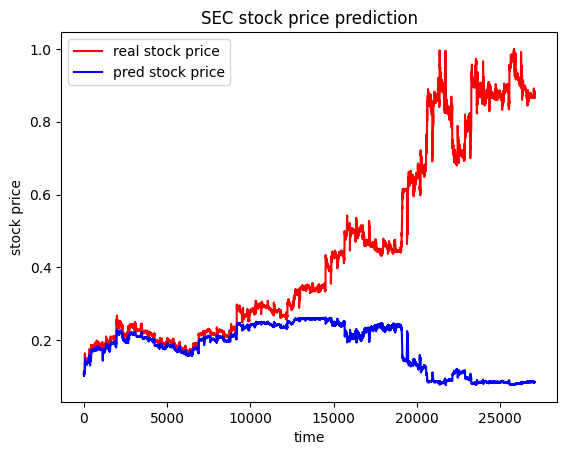

    내일 주가 : [0.08567918]


In [24]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 14))) # input_shape 를 dfx에 맞춰야 한다.
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=10, batch_size=32)
pred_y = model.predict(test_X)
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='pred stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("    내일 주가 :", dfy.close[-1] * pred_y[-1] / dfy.close[-1])

846/846 [==============================] - 11s 13ms/step


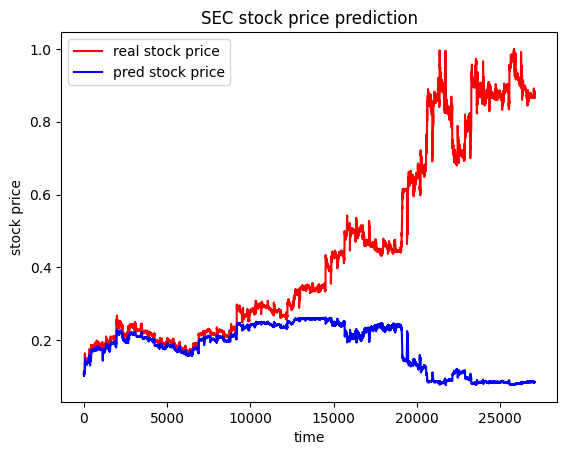

    내일 주가 : [0.08567918]


In [25]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='pred stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("    내일 주가 :", dfy.close[-1] * pred_y[-1] / dfy.close[-1])

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, pred_y)
print("Mean Squared Error:", mse)
    
mae = mean_absolute_error(test_y, pred_y)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mse)
print("Root Mean Square Error:", rmse)


Mean Squared Error: 0.16707322271133138
Mean Absolute Error: 0.2658359350168278
Root Mean Square Error: 0.4087459146111816


In [28]:
from sklearn.metrics import r2_score
r2_y_pred = r2_score(test_y, pred_y)
print(r2_y_pred)

-1.4439478649588189


In [29]:
model.save('./lstmmodel.h5')